#Aplicación de Analisis de sentimientos

Ernesto Reynoso Lizárraga - A01639915

Importamos las librerias

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
!pip install -q transformers
from transformers import pipeline

obtenemos los datos del dataset

In [107]:
df = pd.read_csv("/content/drive/MyDrive/Inteligencia Artificial/NLP/tweets.csv", encoding="latin-1")

In [108]:
df.head()

,Unnamed: 0,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
0,1,RT @mrvelstan: literally nobody:\r\nme:\r\n\r\...,False,0,NaN,2019-04-23 10:43:30,False,NaN,1120639328034676737,NaN,"<a href=""http://twitter.com/download/android"" ...",DavidAc96,637,True,False,NaN,NaN
1,2,"RT @agntecarter: im emotional, sorry!!\r\n\r\...",False,0,NaN,2019-04-23 10:43:30,False,NaN,1120639325199196160,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NRmalaa,302,True,False,NaN,NaN
2,3,saving these bingo cards for tomorrow \r\n©\r\...,False,0,NaN,2019-04-23 10:43:30,False,NaN,1120639324683292674,NaN,"<a href=""http://twitter.com/download/iphone"" r...",jijitsuu,0,False,False,NaN,NaN
3,4,RT @HelloBoon: Man these #AvengersEndgame ads ...,False,0,NaN,2019-04-23 10:43:29,False,NaN,1120639323328540672,NaN,"<a href=""http://twitter.com/download/iphone"" r...",SahapunB,23781,True,False,NaN,NaN
4,5,"RT @Marvel: We salute you, @ChrisEvans! #Capta...",False,0,NaN,2019-04-23 10:43:29,False,NaN,1120639321571074048,NaN,"<a href=""http://twitter.com/download/iphone"" r...",stella22_97,13067,True,False,NaN,NaN


Obtenemos todos los textos de cada tweet

In [109]:
tweets = df['text'].tolist()

obtenemos el modelo con pipeline y lo probamos con una cantidad limitada de tweets (esto para que no tome demasiado tiempo de ejecución)

In [110]:
sentiment_analysis = pipeline("sentiment-analysis")
modelo = sentiment_analysis(tweets[:1000])

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Sumamos el número de resultados "POSITIVE" y "NEGATIVE"

In [111]:
positivos = 0
negativos = 0
for diccionario in modelo:
    valor = diccionario.get("label")
    if valor == "POSITIVE":
      positivos += 1
    else:
      negativos += 1

Comparamos los resultados

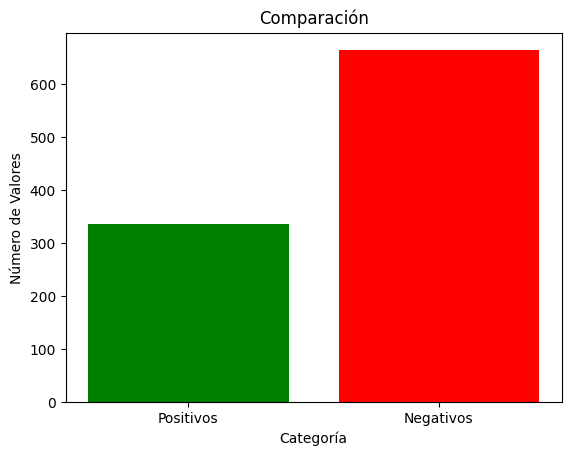

In [112]:
etiquetas = ['Positivos', 'Negativos']
valores = [positivos,negativos]
plt.title("Comparación")

plt.bar(etiquetas, valores, color=['green', 'red'])
plt.xlabel('Categoría')
plt.ylabel('Número de Valores')
plt.show()

Como podemos ver, la mayoria de comentarios los detecto como negativos.

##Bonus

Ahora probaremos con otro modelo pre-entrenado diseñado para analizar tweets

In [113]:
sentiment_analysis = pipeline(model="cardiffnlp/twitter-roberta-base-sentiment")
modelo = sentiment_analysis(tweets[:1000])

En este caso obtenemos "LABEL_0" (negativo), "LABEL_1" (neutral) y "LABEL_2" (positivo)

sumamos las 3 categorias

In [114]:
positivos = 0
negativos = 0
neutrales = 0
for diccionario in modelo:
    valor = diccionario.get("label")
    if valor == "LABEL_2":
      positivos += 1
    elif valor == "LABEL_1":
      neutrales += 1
    else:
      negativos = 1

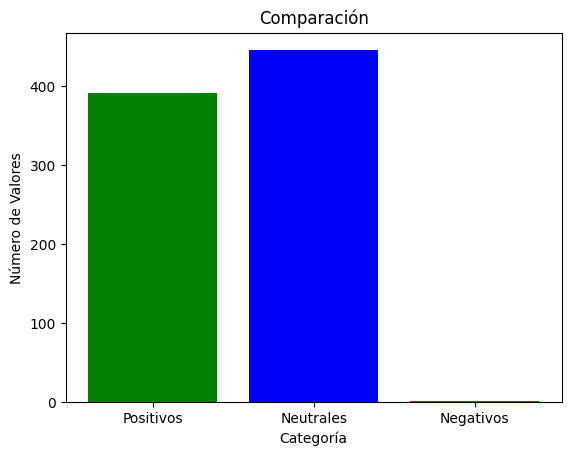

In [115]:
etiquetas = ['Positivos', 'Neutrales', 'Negativos']
valores = [positivos,neutrales,negativos]
plt.title("Comparación")

plt.bar(etiquetas, valores, color=['green','blue', 'red'])
plt.xlabel('Categoría')
plt.ylabel('Número de Valores')
plt.show()

a diferencia del anterior modelo, ningun comentario fue detectado como negativo, a su vez la mayoria de los comentarios fueron neutrales pero los comentarios positivos destacaron mas que en el anterior modelo.